In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, utils, viz

In [10]:
p, n_examples, n_samples = model.HParams(), 2**13, 4
X = utils.stereo_impulse_at_t0(n_examples, n_samples, p, probs=(0.3, 0.7))
m = model.Wavenet(p)
animation = viz.LearningAnimation(n_samples)
t = train.Trainer(m, X, None, train.HParams(max_epochs=1), animation)

In [11]:
t.train()
animation.render('training.gif')

wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)


1:127 loss 0.84054 lr 3.000000e-04: 100%|██████████| 128/128 [04:59<00:00,  2.34s/it]


<Figure size 432x288 with 0 Axes>

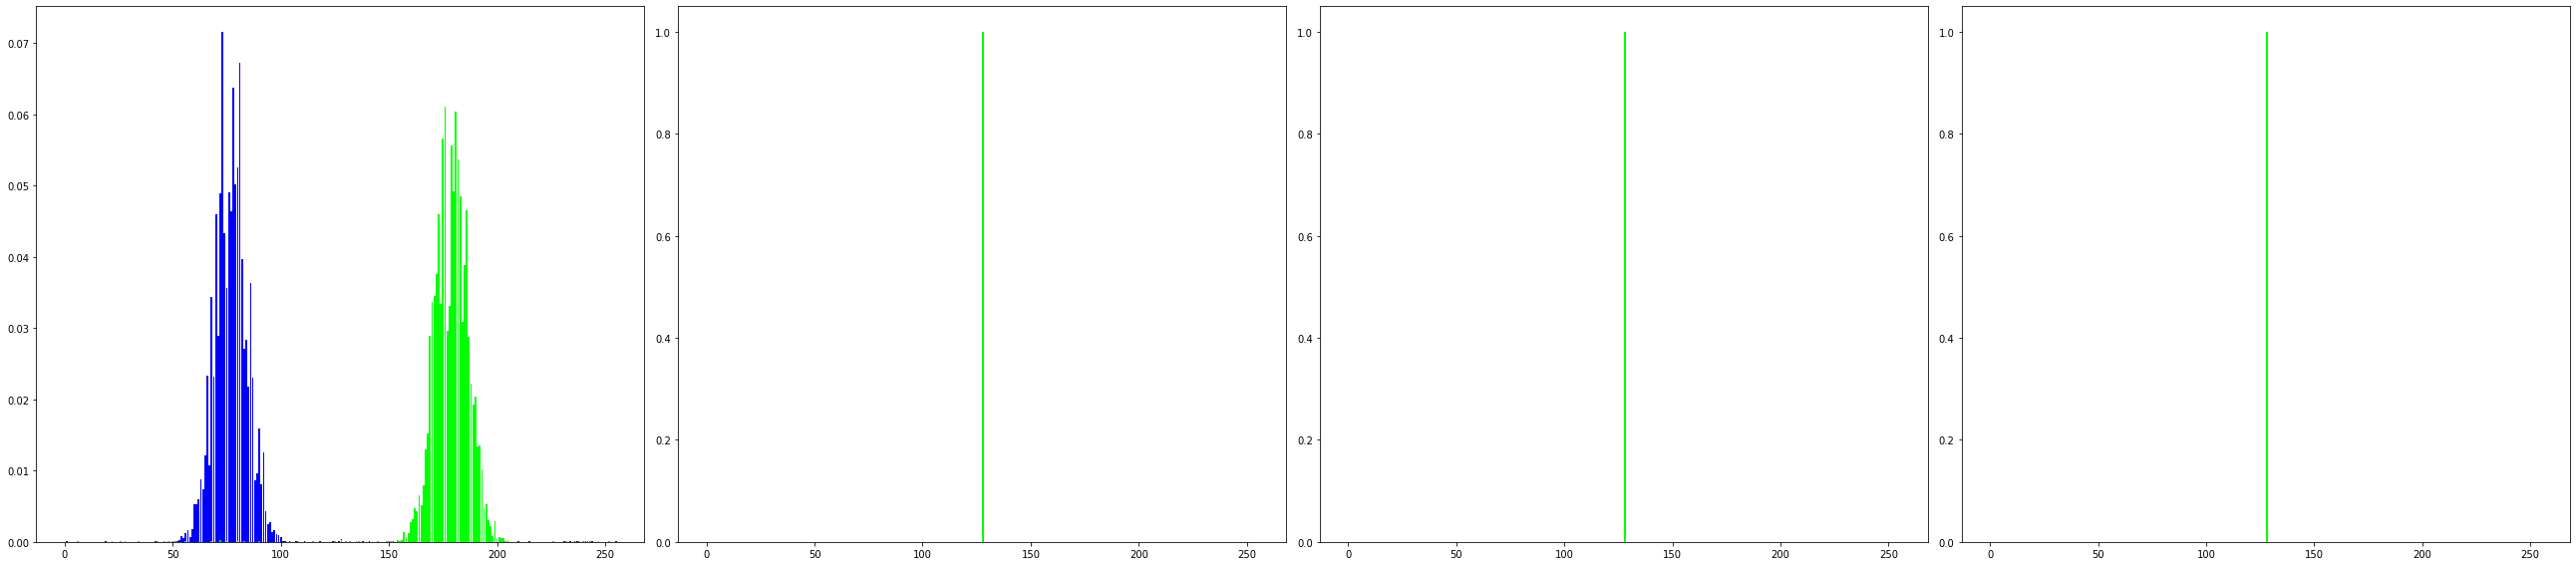

In [13]:
logits, _ = m.forward(X[:10])
plt.clf()
viz.plot_stereo_sample_distributions(logits, 0)
plt.show()